# Training and Evaluation - W05D1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style='darkgrid', context='talk')
import matplotlib.pyplot as plt

# Suppress some warnings that sklearn is returning when a model doesn't perform well
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

### Train/test split example

In [2]:
# Load the dataset
from sklearn.datasets import load_boston
from sklearn.utils import shuffle

boston_data = load_boston()
X, y = boston_data['data'], boston_data['target']

# It is good practice to shuffle your data, since it
# may be ordered in a particular way (e.g. increasing target)
X, y = shuffle(X, y, random_state=27)

print(f'Dataset has {X.shape[0]} data points and {X.shape[1]} features')

Dataset has 506 data points and 13 features


In [3]:
import pandas as pd  # doctest: +SKIP
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [4]:
# Make train/test split
# Let's use 70% of the data for training and evaluate on the remaining 30%
train_ratio = 0.7

X_train, X_test = X[:int(train_ratio * len(X))], X[int(train_ratio * len(X)):]
y_train, y_test = y[:int(train_ratio * len(y))], y[int(train_ratio * len(y)):]

print(f'{len(X_train)} training samples and {len(X_test)} test samples')

354 training samples and 152 test samples


In [5]:
# In practice, we can just use sklearn's convenience function for making the above split instead
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=train_ratio)

print(f'{len(X_train)} training samples and {len(X_test)} test samples')

354 training samples and 152 test samples


In [6]:
# Train our model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [7]:
# Check performance on train and test set
from sklearn.metrics import r2_score

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train R^2:\t{r2_train}\nTest R^2:\t{r2_test}')

Train R^2:	0.7278481991105032
Test R^2:	0.7500070318143887


#### Debrief
The test set performance is actually *higher* than on the train set. Our model isn't overfitting! Maybe it's underfitting?
Perhaps we can use a more complex model and get even better performance on the test set. Let's try polynomial regression.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial feature set and train model
Xpoly_train = PolynomialFeatures(degree=2).fit_transform(X_train)
Xpoly_test = PolynomialFeatures(degree=2).fit_transform(X_test)
print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# Train our model
reg.fit(Xpoly_train, y_train)
ypoly_train_pred = reg.predict(Xpoly_train)
ypoly_test_pred = reg.predict(Xpoly_test)

# Check performance on train and test set
r2poly_train = r2_score(y_train, ypoly_train_pred)
r2poly_test = r2_score(y_test, ypoly_test_pred)
print(f'Train R^2:\t{r2poly_train}\nTest R^2:\t{r2poly_test}')

Number of polynomial features: 105
Train R^2:	0.9295292898979477
Test R^2:	0.8343842465387399


#### Debrief
Our more complex second-order polynomial regression model performed even better on the test set.
Our model might be overfitting, but we are not sure yet.
Let's bump up the complexity one more time and try third-order polynomial regression.

In [9]:
# Create polynomial feature set and train model
from sklearn.preprocessing import PolynomialFeatures
Xpoly3_train = PolynomialFeatures(degree=3).fit_transform(X_train)
Xpoly3_test = PolynomialFeatures(degree=3).fit_transform(X_test)
print(f'Number of polynomial features: {Xpoly3_train.shape[1]}')

# Train our model
reg.fit(Xpoly3_train, y_train)
ypoly3_train_pred = reg.predict(Xpoly3_train)
ypoly3_test_pred = reg.predict(Xpoly3_test)

# Check performance on train and test set
r2poly3_train = r2_score(y_train, ypoly3_train_pred)
r2poly3_test = r2_score(y_test, ypoly3_test_pred)
print(f'Train R^2:\t{r2poly3_train}\nTest R^2:\t{r2poly3_test}')

Number of polynomial features: 560
Train R^2:	1.0
Test R^2:	-680.1136851497927


#### Debrief
Our even more complex third-order polynomial regression model did horribly on the test set. Notice that it overfit the training set completly (perfect prediction). This can always happen in linear regression when we have more features than data points (which is the case here).

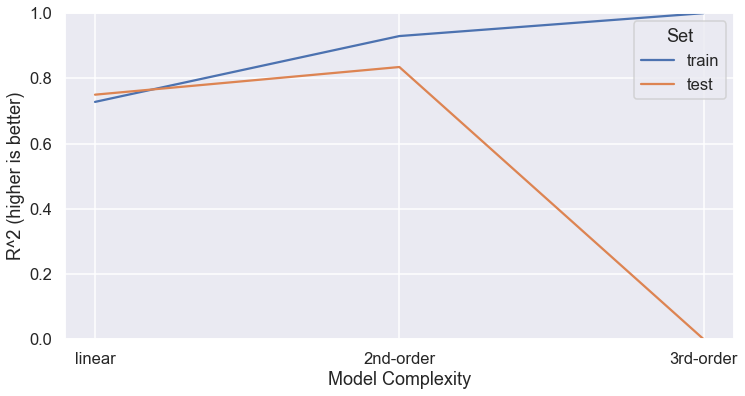

In [14]:
# Show performance of all models on train and test set
from sklearn.model_selection import train_test_split
df = pd.DataFrame({'Model Complexity': ['linear', 'linear', '2nd-order', '2nd-order', '3rd-order', '3rd-order'],
                  'R^2': [r2_train, r2_test, r2poly_train, r2poly_test, r2poly3_train, r2poly3_test],
                  'Set': ['train', 'test', 'train', 'test', 'train', 'test']})
df['R^2'] = df['R^2'].clip(lower=0)    # Threshold minimum R^2 to 0 for nicer display of results (if it's 0, we already know it learned nothing)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Complexity', y='R^2', hue='Set', data=df, sort=False)
plt.ylim(ymin=0, ymax=1)
plt.ylabel('R^2 (higher is better)')
plt.show()

### Cross-validation example

In [15]:
# Make the folds
k_folds = 5

X_folds, y_folds = np.array_split(X, k_folds), np.array_split(y, k_folds)

fold_sizes = ', '.join([str(len(f)) for f in X_folds])
print(f'The folds are of type {type(X_folds)} and contain {fold_sizes} data points')

The folds are of type <class 'list'> and contain 102, 101, 101, 101, 101 data points


In [16]:
# List that will accumulate test performance on each fold
cv_r2 = []

for i in range(k_folds):
    # Make the train/test set for this fold
    X_test = X_folds[i]
    y_test = y_folds[i]
    X_train = [X_folds[j] for j in range(k_folds) if j != i]
    y_train = [y_folds[j] for j in range(k_folds) if j != i]
    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)
    
    # Train the model
    reg.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    cv_r2.append(r2)
    
print(cv_r2)

[0.7057189451172952, 0.6566041936444884, 0.7203026852522949, 0.7898705155348588, 0.7287877060675547]


In [17]:
# Get the mean and standard deviation of the cross-validation test set performance across folds
cv_r2 = np.array(cv_r2)
print(f'Cross-validated R^2\nMean:\t{cv_r2.mean()}\nStd.:\t{cv_r2.std()}')

Cross-validated R^2
Mean:	0.7202568091232984
Std.:	0.04285289109219573


#### Debrief
Notice that this test set performance is actually lower than in our initial example when we split the
dataset once into a train/test set. We should trust this estimate more, because it was computed
from 5 different train/test splits rather than a single one.

#### sklearn provides an easier way to do cross-validation

In [18]:
from sklearn.model_selection import KFold

# List that will accumulate test performance on each fold
cv_r2 = []

kf = KFold(n_splits=k_folds)

for train_idx, test_idx in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    
    # Train the model
    reg.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    cv_r2.append(r2)
    
# Get the mean and standard deviation of the cross-validation test set performance across folds
cv_r2 = np.array(cv_r2)
print(f'Cross-validated R^2\nMean:\t{cv_r2.mean()}\nStd.:\t{cv_r2.std()}')

Cross-validated R^2
Mean:	0.7202568091232984
Std.:	0.04285289109219573


#### And sklearn provides an even easier way if all we're interested in is the scores

In [19]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(reg, X, y, cv=k_folds, scoring='r2')
print(f'Cross-validated R^2\nMean:\t{cv_r2.mean()}\nStd.:\t{cv_r2.std()}')

Cross-validated R^2
Mean:	0.7202568091232984
Std.:	0.04285289109219573


### What to do after cross-validation?
**Question**: Cross-validation will give us a more robust estimate of the true out of sample error. However, we have ended up training several models. Which do we pick to finally deploy?

**Answer**: None of them! Cross-validation has served its purpose by giving us a robust estimate of how our model will perform out in the real world. Now, we train our model on the entire dataset, since more data almost always means a better model.

## Hyperparameter tuning
- Most models often have parameters that we must set, which are not learned during training. We call these **hyperparameters**
- For instance, Ridge Regression, which uses L2 regularization to prevent overfitting, requires us to set a λ parameter that balances the weight penalty vs. prediction error in the loss term
- If these hyperparameters are not learned during training, how do we learn them?
- The most common method amounts to, disappointingly, guess-and-check... We try a bunch of values for the hyperparameters and set them to whatever achieves the lowest loss
    - Common techniques: grid search, random search
    - More advanced techniques (that we won't look at): Bayesian optimization, genetic algorithms

### Grid search with cross-validation example

In [20]:
from sklearn.linear_model import ElasticNet
#model with 2 hyperparameters
#combination of lasso and ridge regression penalties

from sklearn.preprocessing import StandardScaler

# Scale features since weight magnitudes will effect regularization weight penalties
X_scaled = StandardScaler().fit_transform(X)

# Hyperparameter settings we want to try
alphas = [0.001, 0.01, 0.1, 1] #lambda (controls effect of penalty)
l1_ratios = [0, 0.25, 0.5, 0.75, 1] #lasso vs ridge penalty (0=ridge, 1=lasso)

# Keep track of the best hyperparameters found so far
best_r2 = -np.inf
best_alpha = None
best_l1_ratio = None

for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=27)
        cv_r2 = cross_val_score(model, X_scaled, y, cv=k_folds, scoring='r2')
        if cv_r2.mean() > best_r2:
            best_r2 = cv_r2.mean()
            best_alpha = alpha
            best_l1_ratio = l1_ratio
            
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {best_r2}\nAlpha:\t{best_alpha}\nL1 ratio:\t{best_l1_ratio}')

The best hyperparameter settings achieve a cross-validated R^2 of: 0.7206816828526259
Alpha:	0.01
L1 ratio:	0


**Question**: How many models were trained?

#### As always, sklearn provides an easier way

In [21]:
from sklearn.model_selection import GridSearchCV

# Make a dictionary with model arguments as keys and lists of grid settings as values
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=k_folds, scoring='r2', verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
grid_result = grid.fit(X_scaled, y)

best_r2 = grid_result.best_score_
best_alpha = grid_result.best_params_['alpha']
best_l1_ratio = grid_result.best_params_['l1_ratio']
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {best_r2}\nAlpha:\t{best_alpha}\nL1 ratio:\t{best_l1_ratio}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best hyperparameter settings achieve a cross-validated R^2 of: 0.7206816828526259
Alpha:	0.01
L1 ratio:	0


In [22]:
best_model = grid_result.best_estimator_ #use this model as your best model
best_model

ElasticNet(alpha=0.01, l1_ratio=0, random_state=27)

### Train/validation/test split
**Question**: Have you noticed anything wrong with what we are doing? Should we trust our cross-validation score as a true estimate of performance on out-of-sample data?

**Answer**: No, we cannot trust it. We have been using the cross-validation score to select hyperparameters. You can think of this as having used the validation data in each fold to train our model in a way. So, our model will be biased to the dataset and our cross-validation score will be overly-optimistic.

**Solution**:
1. Split the dataset into a train/test set
2. Perform grid search with cross-validation on the training set. Each fold, the training set will be split into a train/validation set
3. Using the hyperparameters that obtained the best cross-validation score, retrain the model on the entire training set (not just training folds within this training set)
4. Evaluate the model on the test set to get a true estimate of the out-of-sample error

<img src="images/cross_validation_with_test.png" style="width: 1000px;"/>

*Note*: Instead of splitting the dataset into a train/test set once and doing cross-validation on that single train set, we can perform a nested cross-validation. This gives us an even better estimate of how well our model, training scheme, and hyperparameter search scheme will perform out in the real world. See [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html) for an example.

In [23]:
#FULL EXAMPLE
# Split data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=0.8)

# Standardize the data using only statistics from the training set
# (always assume no knowledge of the test set for most unbiased performance estimate)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=k_folds, scoring='r2', verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
grid_result = grid.fit(X_train, y_train)

best_r2 = grid_result.best_score_
best_alpha = grid_result.best_params_['alpha']
best_l1_ratio = grid_result.best_params_['l1_ratio']
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {best_r2}\nAlpha:\t{best_alpha}\nL1 ratio:\t{best_l1_ratio}')

# Using the best hyperparameters, retrain on the entire train set and evaluate on the test set
best_model = grid_result.best_estimator_    # Sklearn automatically retrains the model on the whole training set following cross-validation using the best hyperparameters
y_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(f'R^2 on the test set:\t{r2_test}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best hyperparameter settings achieve a cross-validated R^2 of: 0.7171522166211203
Alpha:	0.01
L1 ratio:	0
R^2 on the test set:	0.7254939323079763


---
# Model Evaluation

## Regression

### Mean Squared Error (L2)
- Commonly used (especially as training loss)
- Large errors (from outliers) have disproportionate impact
- Units not intuitive
- Task-dependent (i.e. no maximum bound)

\begin{align}
    MSE &= \frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2 \\
        &= \frac{1}{n} (\mathbf{y} - \mathbf{\hat{y}})^T (\mathbf{y} - \mathbf{\hat{y}})
\end{align}


### Root Mean Squared Error
- Commonly used for evaluation, but not for training loss
- Large errors (from outliers) have disproportionate impact
- Units are intuitive
- Task-dependent (i.e. no maximum bound)

\begin{align}
    RMSE &= \sqrt{\frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2} \\
         &= \sqrt{\frac{1}{n} (\mathbf{y} - \mathbf{\hat{y}})^T (\mathbf{y} - \mathbf{\hat{y}})}
\end{align}

### Mean Absolute Error (L1)
- Commonly used (especially as training loss, but less than Mean Squared Error)
- Outliers have less impact
- Units are intuitive
- Task-dependent (i.e. no maximum bound)

\begin{align}
    MAE &= \frac{1}{n} \sum_{i=0}^n |y_i - \hat{y}_i|
\end{align}

### Coefficient of Determination ($R^2$)
- Measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X)
- Commonly used for evaluation, but not for training loss
- Intuitive interpretation
- Task-independent (ranges from 0 to 1, although negative values can mean worse than most naive solution)
- *Adjusted $R^2$* variant adjusts the statistic based on the number of independent variables in the model

\begin{align}
    R^2 &= 1 - \frac{\text{Unexplained variance}}{\text{Total variance}} \\
        &= 1 - \frac{MSE_{model}}{MSE_{baseline}} \\
        &= 1 - \frac{(\mathbf{y} - \mathbf{\hat{y}})^T (\mathbf{y} - \mathbf{\hat{y}})}{(\mathbf{y} - \mathbf{y}_{avg})^T (\mathbf{y} - \mathbf{y}_{avg})}
\end{align}

## Classification
- **Goal**: Predict between two or more discrete classes. For between two classes, called *binary* classification
- **Example**: Predict whether or not someone has cancer (binary), predict what object is shown in an image (multiclass)

### Accuracy
$$acc = \frac{\text{# of times correct}}{\text{# of predictions made}}$$

### Confusion matrix
Full detail about how model fails

| | Actual + | Actual - |
|-|-|-|
|Predicted + | True Positive | False Positive | 
|Predicted - | False Negative | True Negative |

<img src="images/multiclass_confusion_matrix.png" style="width: 300px; display: block; margin-left: auto; margin-right: auto"/>

#### In a binary case of 100 examples (50+, 50-), 95% accuracy:

| | Actual + | Actual - |
|-|-|-|
|Predicted + | 50| 5 | 
|Predicted - |0 | 45|

| | Actual + | Actual - |
|-|-|-|
|Predicted + | 45| 0 | 
|Predicted - |5 | 50|

- Which model would you rather have predicting...
    - **cancer diagnosis**? (positive means "has cancer")
    - **spam filtering**? (positive means "is spam")
    
**Conclusion**: How your model fails matters

### Metrics computed from binary confusion matrix

#### _Recall_: True positives / Actual positives
- We want high recall when we don't want to miss any positive conditions
- Good for something like cancer diagnosis

#### _Precision_: True positives / Predicted positives
- We want high precision if the machine learning model is going to trigger some automated process
- Good for something like spam detection

#### _F1 score_: 2 * (Precision * Recall) / (Precision + Recall)
- Combine both precision and recall into a single general-purpose metric
- Useful for quickly comparing models
- There are variations that weight precision/recall unequally

### Example

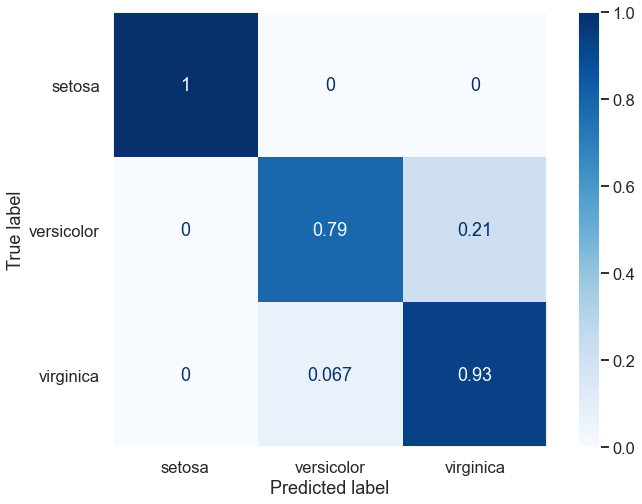

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.79      0.85        14
           2       0.82      0.93      0.87        15

    accuracy                           0.89        38
   macro avg       0.91      0.91      0.91        38
weighted avg       0.90      0.89      0.89        38



In [24]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load a classification dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

# Using a sample model (we will dive into details another day)
classifier = SVC(kernel='linear', C=0.01)
classifier.fit(X_train, y_train)

# Plot confusion matrix
plot_confusion_matrix(classifier, X_test, y_test,
                      display_labels=class_names, cmap=plt.cm.Blues, normalize='true')
plt.grid(False)
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.show()

# Get a classification report with multiple statistics
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))